## Arm Reaching (RM Session 1)

In [1]:
import os
import glob
import numpy as np
import mne
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from google.colab import drive
# drive.mount('/content/drive')
from scipy.io import loadmat
from scipy.signal import butter, lfilter
warnings.filterwarnings('ignore')

### BrainVision (.vhdr, .vmrk, .eeg)

The BrainVision file format consists of three separate files:

1. A text header file (.vhdr) containing meta data.

2. A text marker file (.vmrk) containing information about events in the data.

3. A binary data file (.eeg) containing the voltage values of the EEG.

In [2]:
folder_path=r'D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM'
folder_files=os.listdir(folder_path)
for i in folder_files:
    print(i)

session1_sub10_reaching_realMove.eeg
session1_sub10_reaching_realMove.vhdr
session1_sub10_reaching_realMove.vmrk
session1_sub11_reaching_realMove.eeg
session1_sub11_reaching_realMove.vhdr
session1_sub11_reaching_realMove.vmrk
session1_sub12_reaching_realMove.eeg
session1_sub12_reaching_realMove.vhdr
session1_sub12_reaching_realMove.vmrk
session1_sub13_reaching_realMove.eeg
session1_sub13_reaching_realMove.vhdr
session1_sub13_reaching_realMove.vmrk
session1_sub14_reaching_realMove.eeg
session1_sub14_reaching_realMove.vhdr
session1_sub14_reaching_realMove.vmrk
session1_sub15_reaching_realMove.eeg
session1_sub15_reaching_realMove.vhdr
session1_sub15_reaching_realMove.vmrk
session1_sub16_reaching_realMove.eeg
session1_sub16_reaching_realMove.vhdr
session1_sub16_reaching_realMove.vmrk
session1_sub17_reaching_realMove.eeg
session1_sub17_reaching_realMove.vhdr
session1_sub17_reaching_realMove.vmrk
session1_sub18_reaching_realMove.eeg
session1_sub18_reaching_realMove.vhdr
session1_sub18_reachi

In [3]:
eeg,vhdr,vmrk = [],[],[]

for i in folder_files:
    file=folder_path+'\\'+i
    if '.eeg' in file:
        eeg.append(file) 
    elif '.vhdr' in file:
        vhdr.append(file) 
    else:
        vmrk.append(file)
        
for i in range(0,len(eeg)):
    print(eeg[i]+'\n'+vhdr[i]+'\n'+vmrk[i]+'\n')

D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub10_reaching_realMove.eeg
D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub10_reaching_realMove.vhdr
D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub10_reaching_realMove.vmrk

D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub11_reaching_realMove.eeg
D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub11_reaching_realMove.vhdr
D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub11_reaching_realMove.vmrk

D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub12_reaching_realMove.eeg
D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub12_reaching_realMove.vhdr
D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub12_reaching_realMove.vmrk

D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub13_reaching_realMove.eeg
D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub13_reaching_realMove.vhdr
D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub13_reaching_realMove.vmrk

D:\EEG_RawData\EEG_RawData\A

### Read Raw Signals

In [4]:
raw = mne.io.read_raw_brainvision(vhdr[1], misc='auto', scale=1.0, preload=True, verbose=None)
raw # OR raw.info

Extracting parameters from D:\EEG_RawData\EEG_RawData\Arm-Reaching\RM\session1_sub11_reaching_realMove.vhdr...
Setting channel info structure...
Reading 0 ... 8488199  =      0.000 ...  3395.280 secs...


<RawBrainVision | session1_sub11_reaching_realMove.eeg, 71 x 8488200 (3395.3 s), ~4.49 GB, data loaded>

In [5]:
raw.set_channel_types(mapping={'hEOG_L': 'eog', 'hEOG_R': 'eog', 'vEOG_U': 'eog', 'vEOG_D': 'eog'})
raw.set_channel_types(mapping={'EMG_1': 'emg', 'EMG_2': 'emg', 'EMG_3': 'emg', 'EMG_4': 'emg', 'EMG_5': 'emg', 'EMG_6': 'emg', 'EMG_ref': 'emg'})
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, AFz, F7, F5, F3, F1, Fz, FT7, FC5, FC3, FC1, T7, ...
 chs: 60 EEG, 4 EOG, 7 EMG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1250.0 Hz
 meas_date: 2019-07-30 10:12:06 UTC
 nchan: 71
 projs: []
 sfreq: 2500.0 Hz
>

In [8]:
print('bad channels:', raw.info['bads'])  # chs marked "bad" during acquisition
print(raw.info['sfreq'], 'Hz')            # sampling frequency
print(raw.info['description'], '\n')      # miscellaneous acquisition info

bad channels: []
2500.0 Hz
None 



Using matplotlib as 2D backend.


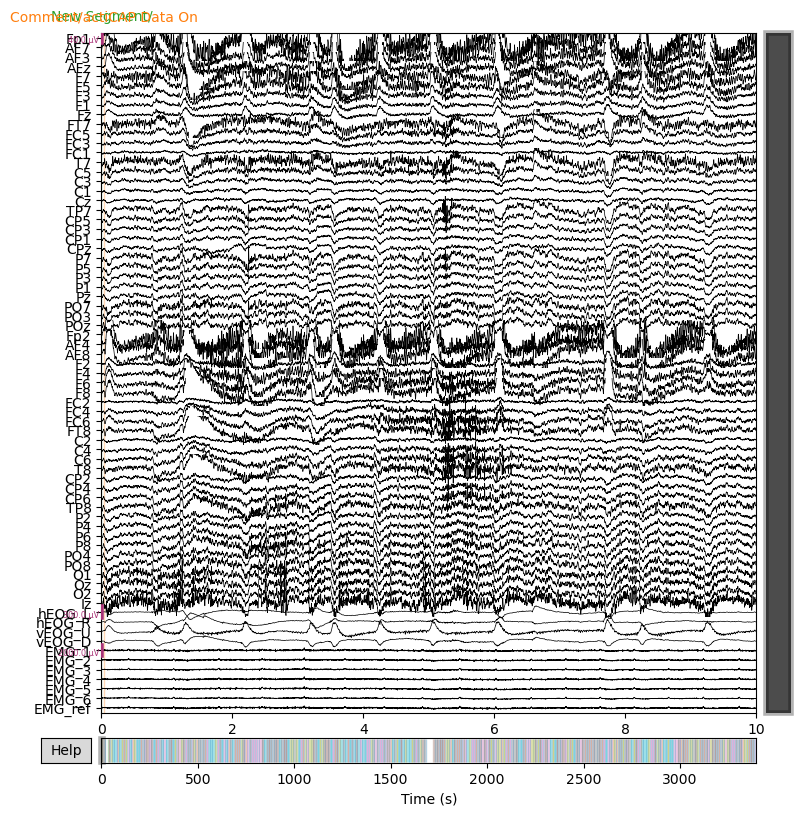

In [6]:
raw.plot(n_channels=71);

### For One Session, Each Subject Do :
 - 50 Trials For Each Class : 50 x 6 ( Classes ) = Total 300 Trials
 
 - Each Trial has Time Duration 7s ( 3s Visual Cue + 4s Movement Implementation )

 - and There Are 300 Rest Periods Between Those Trials ( Each Rest Period has Time Duration 4s )
 
 - Finally,
      Total Session Time = 50 x 6 x 7 + 300 x 4 = almost 3300 seconds 

In [7]:
print('First Time : ',raw.first_time)
print('Last Time  : ',raw._last_time)

First Time :  0.0
Last Time  :  3395.2796


- Therefore, The Total Count of Samples For All Trials : 300 ( Trials ) x 7s x 2500 (Fs) + 300 (Rests) x 4s x 2500 (Fs) is almost 8,250,000

In [11]:
print('Total Samples : ',len(raw))
print('Start : ',raw._first_samps) 
print('End : ',raw._last_samps)

Total Samples :  9108800
Start :  [0]
End :  [9108799]


### time_as_index()
- Convert time to indices ( time ( s ) : index ( 0-based ) )

- Input : List of numbers or a number representing points in time.

- Return : Indices relative to first_samp corresponding to the times supplied.

In [10]:
print(raw.time_as_index([1, 2, 3, 4, 5]), '\n')
print(np.diff(raw.time_as_index([1, 2, 3])))

[ 2500  5000  7500 10000 12500] 

[2500 2500]


### Electrodes Handling :
### pick_types() : Picking Some Type of Signals and Ignore Others.
### pick_channels() : pick channels by name.
### drop_channels() : method to remove channels by name.

In [12]:
# this piece of code does not make changes in this case, only for learn

# eeg_and_eog = raw.copy().pick_types(emg=False, eeg=True, eog=True)
# print(len(raw.ch_names), '→', len(eeg_and_eog.ch_names))

### We Will Select Channels According to International Standard 10–20 system 

<img src="The-location-map-of-32-channels-cap-The-electrodes-can-be-divided-into-3-groups.png" style="width:400px;hight:400;"/>

In [12]:
print(raw.ch_names)

['Fp1', 'AF7', 'AF3', 'AFz', 'F7', 'F5', 'F3', 'F1', 'Fz', 'FT7', 'FC5', 'FC3', 'FC1', 'T7', 'C5', 'C3', 'C1', 'Cz', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'P7', 'P5', 'P3', 'P1', 'Pz', 'PO7', 'PO3', 'POz', 'hEOG_L', 'hEOG_R', 'vEOG_U', 'vEOG_D', 'Fp2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'FC2', 'FC4', 'FC6', 'FT8', 'C2', 'C4', 'C6', 'T8', 'CP2', 'CP4', 'CP6', 'TP8', 'P2', 'P4', 'P6', 'P8', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz', 'EMG_1', 'EMG_2', 'EMG_3', 'EMG_4', 'EMG_5', 'EMG_6', 'EMG_ref']


In [8]:
selected_channels = ["Fp1", "AF3","F7","F3","FC1","FC5","T7","C3","CP1","CP5","P7","P3", "PO3", "O1",  # Brain Left Side
                     "Fz","Cz","Pz","Oz",                                                              # Brain Mid
                     "O2","FC2","F4","F8","AF4","Fp2","C4", "T8","FC6","CP2","PO4","P4","P8","CP6",    # Brain Right Side   
                     "hEOG_L", "hEOG_R", "vEOG_U", "vEOG_D"]                                           # EOG Channels                                

In [9]:
raw.pick_channels(ch_names=selected_channels)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
print(len(raw.ch_names))

36


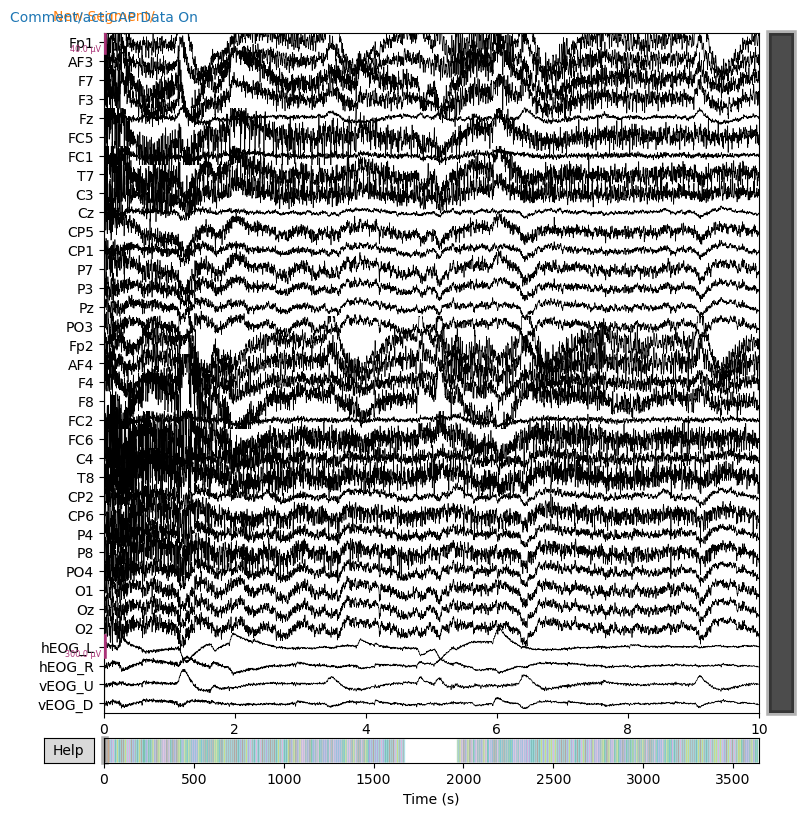

In [15]:
raw.plot(n_channels=36);

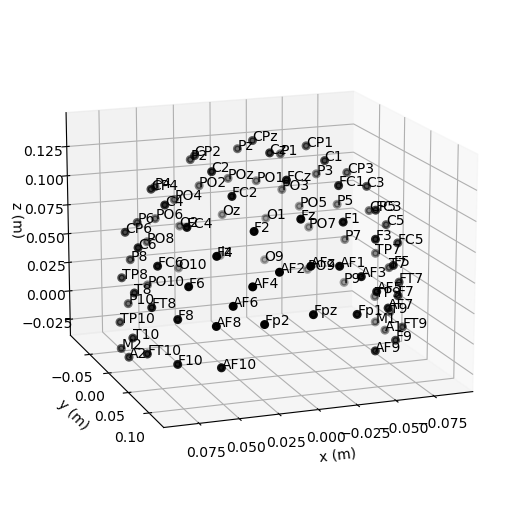

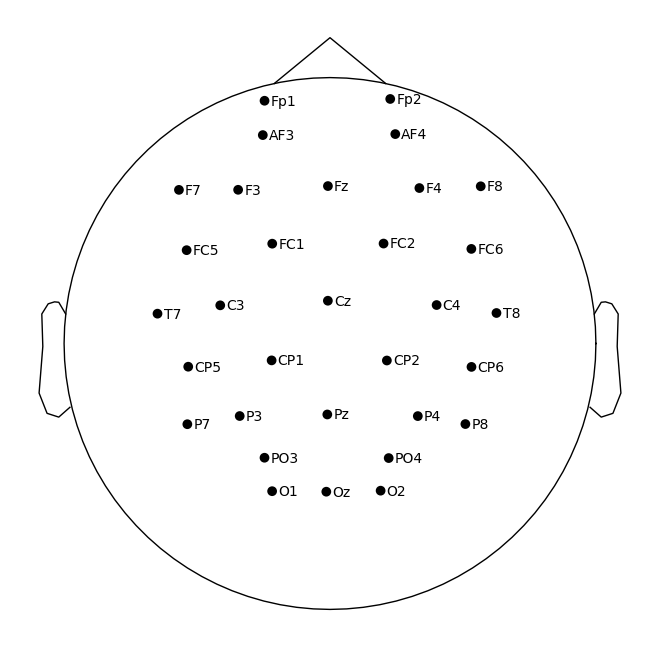

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


In [18]:
raw.plot_sensors(show_names=True,sphere=0.11);
fig = montage.plot(kind='3d',show=False)
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

### Plotting spectral density of continuous data

- To visualize the frequency content of continuous data

- the Raw object provides a compute_psd() method to compute spectral density and the resulting Spectrum object has a plot() method

Effective window size : 0.102 (s)


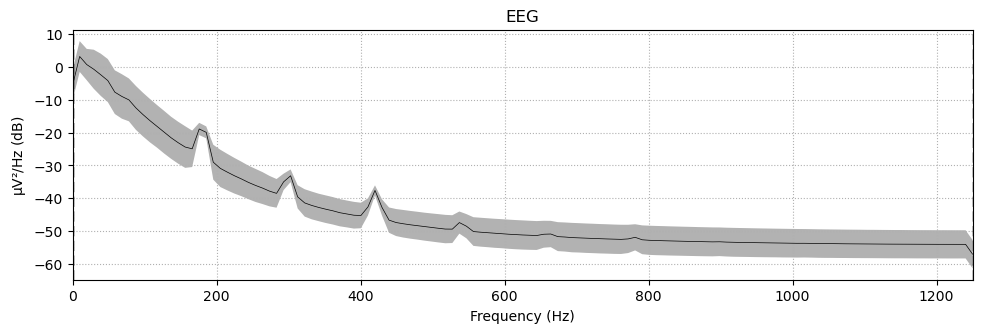

In [10]:
spectrum = raw.compute_psd()
spectrum.plot(average=True)

### plot spectral power estimates across sensors as a scalp topography
- will compute power based on magnetometer channels (if present), and will plot the power estimates on a dB-like log-scale.

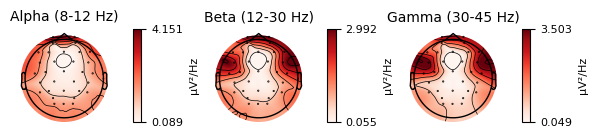

In [18]:
spectrum.plot_topomap(bands={'Alpha (8-12 Hz)': (8, 12), 'Beta (12-30 Hz)': (12, 30),'Gamma (30-45 Hz)': (30,45)});

### plot the PSD for every sensor on its own axes
- the axes arranged spatially to correspond to sensor locations in space.

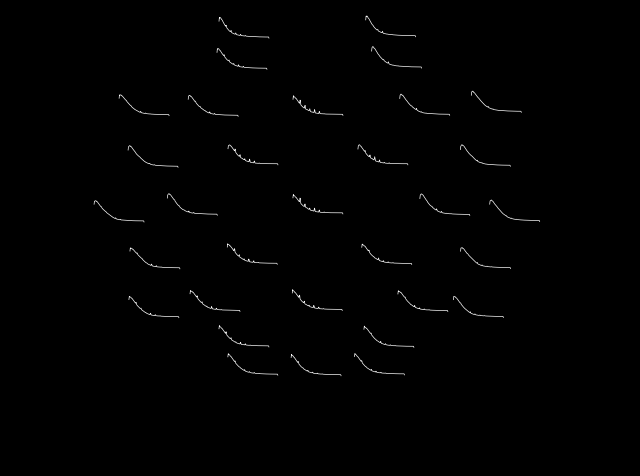

In [19]:
spectrum.plot_topo();

### Bandpass Filtering the Data
- Filtering to remove slow drift.
- Before we run the ICA, an important step is filtering the data to remove low-frequency drifts, which can negatively affect the quality of the ICA fit.

In [11]:
raw.filter(l_freq=8,h_freq=30, method='iir', iir_params=dict(order=4, ftype='butter', output='sos'), phase='zero-double')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 30.00 Hz: -6.02, -6.02 dB



<RawBrainVision | session1_sub11_reaching_realMove.eeg, 36 x 8488200 (3395.3 s), ~2.28 GB, data loaded>

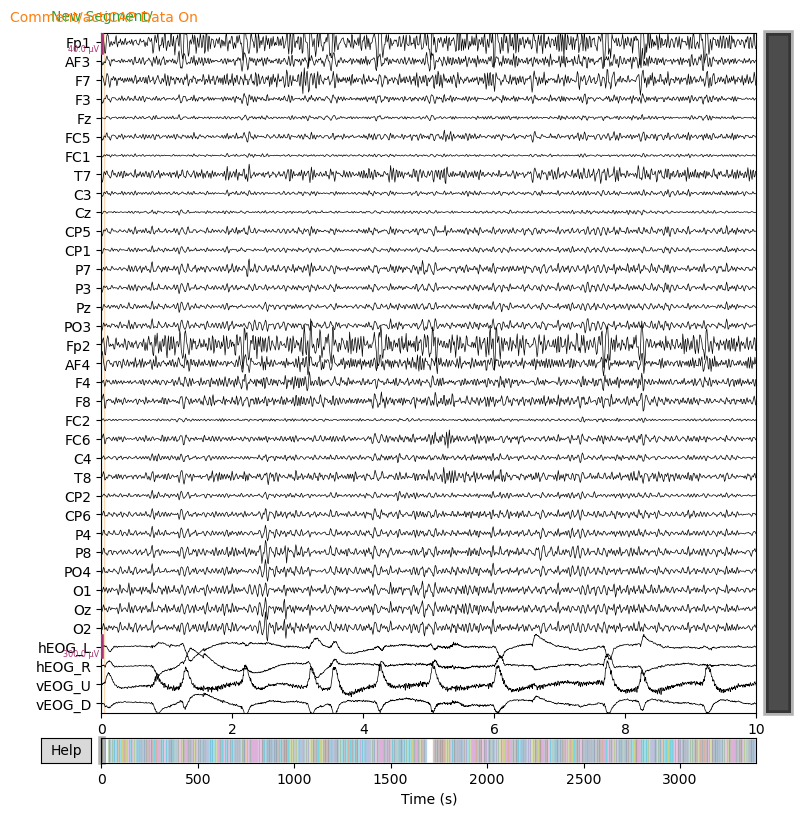

In [13]:
raw.plot(n_channels=36);

Effective window size : 0.102 (s)


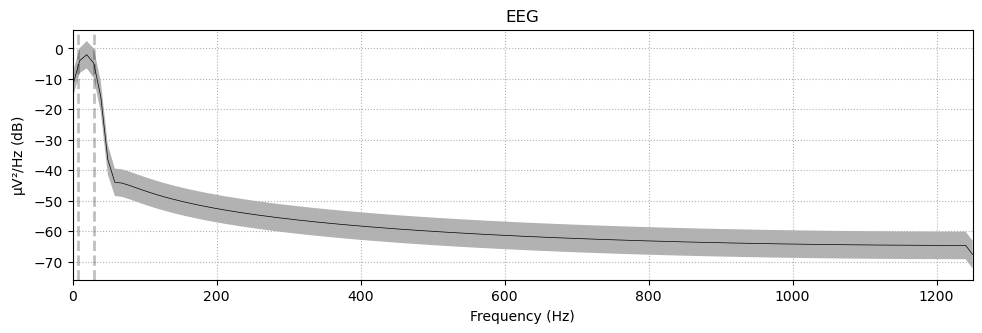

In [23]:
spectrum = raw.compute_psd()
spectrum.plot(average=True)

### Refrencing EEG

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


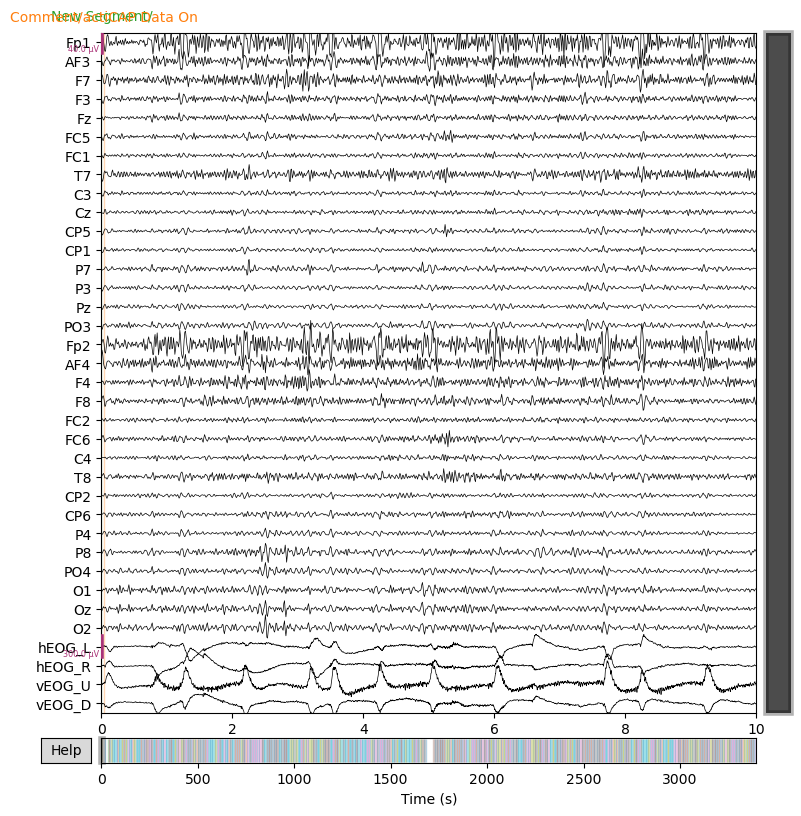

In [14]:
# Average reference. This is normally added by default, but can also be added
# explicitly.
raw.set_eeg_reference(ref_channels='average')
raw.plot(n_channels=36);

In [3]:
# ### Detect Ocular artifacts (EOG)

# - MNE-Python includes functions for detecting and extracting ocular artifacts: find_eog_events() and create_eog_epochs(). Once again we’ll use the higher-level convenience function that automatically finds the artifacts and extracts them in to an Epochs object in one step. 

# - ocular artifacts are usually most prominent in the EEG channels.

# - note that there are many fewer blinks than heartbeats, which makes the image plots appear somewhat blocky.

In [26]:
# # baseline : The electrical signal from a sensor when no measured variable is present. Often referred to the output at no-load condition
# eog_epochs = mne.preprocessing.create_eog_epochs(raw,ch_name=["hEOG_L", "hEOG_R", "vEOG_U", "vEOG_D"], baseline=(-0.5, -0.2))
# eog_epochs.plot_image(combine='mean');
# eog_epochs.average().plot_joint();

In [1]:
# eog_epochs

In [4]:
# ### Repairing artifacts with regression --Raw Data--
# Remove EOG artifact signals from other channels by regression.

In [28]:
# weights = mne.preprocessing.EOGRegression(picks='eeg', picks_artifact='eog').fit(raw)

In [29]:
# fig = weights.plot(vlim=(None, 0.4))  # regression coefficients / weights as topomap
# fig.set_size_inches(3, 2)

In [30]:
# # Fit the regression model
# raw_clean = weights.apply(raw, copy=False)

# # Show the filter weights in a topomap
# weights.plot();

In [5]:
# ### Repairing artifacts with ICA
# Note : ICA fitting is not deterministic (e.g., the components may get a sign flip on different runs, or may not always be returned in the same order), so we’ll also specify a random seed so that we get identical results each time this tutorial is built by our web servers

In [31]:
# ica = mne.preprocessing.ICA(n_components=32, max_iter='auto',random_state=0,method='infomax')
# ica.fit(raw.copy()) 

In [33]:
# ica.plot_components();

In [34]:
# # use automatic detection
# bad_indx,scores = ica.find_bads_eog(raw,ch_name=["hEOG_L","hEOG_R","vEOG_U","vEOG_D"],threshold=3,)
# print(bad_indx)

In [35]:
# raw.plot(n_channels=32);

In [36]:
# ica.exclude = bad_indx
# ica.apply(raw.copy(),exclude=ica.exclude).plot();

In [ ]:
# ica.apply(raw,exclude=ica.exclude)

### Read Events & Epoching

In [15]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['Comment/actiCAP Active Shield On', 'Comment/actiCAP Data On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  8', 'Stimulus/S 11', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 21', 'Stimulus/S 31', 'Stimulus/S 41', 'Stimulus/S 51', 'Stimulus/S 61']


In [27]:
list(events[0])

[array([    0,     0, 99999]),
 array([    0,     0, 10001]),
 array([56702,     0,    13]),
 array([66778,     0,     5]),
 array([74292,     0,    51]),
 array([84335,     0,     8]),
 array([94418,     0,     2]),
 array([101930,      0,     21]),
 array([111972,      0,      8]),
 array([122079,      0,      4]),
 array([129588,      0,     41]),
 array([139632,      0,      8]),
 array([149724,      0,      1]),
 array([157233,      0,     11]),
 array([167272,      0,      8]),
 array([177357,      0,      6]),
 array([184867,      0,     61]),
 array([194911,      0,      8]),
 array([204983,      0,      1]),
 array([212492,      0,     11]),
 array([222536,      0,      8]),
 array([232609,      0,      3]),
 array([240119,      0,     31]),
 array([250160,      0,      8]),
 array([260234,      0,      3]),
 array([267743,      0,     31]),
 array([277795,      0,      8]),
 array([287879,      0,      6]),
 array([295389,      0,     61]),
 array([305427,      0,      8]),
 

In [17]:
event_ids = {'Stimulus/S 11': 11,'Stimulus/S 21': 21,'Stimulus/S 31': 31,'Stimulus/S 41': 41,'Stimulus/S 51': 51,'Stimulus/S 61': 61}
epochs = mne.Epochs(raw, events=events[0], event_id=event_ids, tmin=0, tmax=4, preload=True,baseline=(0, 0))
epochs

Not setting metadata
300 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 300 events and 10001 original time points ...
0 bad epochs dropped


<Epochs |  300 events (all good), 0 - 4 sec, baseline 0 – 0 sec, ~824.1 MB, data loaded,
 'Stimulus/S 11': 50
 'Stimulus/S 21': 50
 'Stimulus/S 31': 50
 'Stimulus/S 41': 50
 'Stimulus/S 51': 50
 'Stimulus/S 61': 50>

In [18]:
epochs.get_data().shape

(300, 36, 10001)

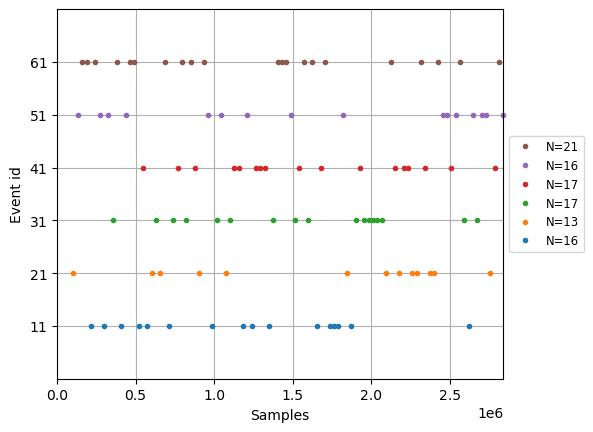

In [19]:
mne.viz.plot_events(epochs.events[:100]);

### Epochs Downsampling

In [20]:
epochs.resample(sfreq=1250)
epochs.get_data().shape

(300, 36, 5000)

In [40]:
# epochs.plot(n_epochs=5);

### Repairing artifacts with ICA 
Note : ICA fitting is not deterministic (e.g., the components may get a sign flip on different runs, or may not always be returned in the same order), so we’ll also specify a random seed so that we get identical results each time this tutorial is built by our web servers

In [34]:
ica = mne.preprocessing.ICA(n_components=20, max_iter='auto',random_state=0,method='fastica')
ica.fit(epochs.copy()) 

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 34.8s.


<ICA | epochs decomposition, method: fastica (fit in 42 iterations on 1500000 samples), 20 ICA components (32 PCA components available), channel types: eeg, no sources marked for exclusion>

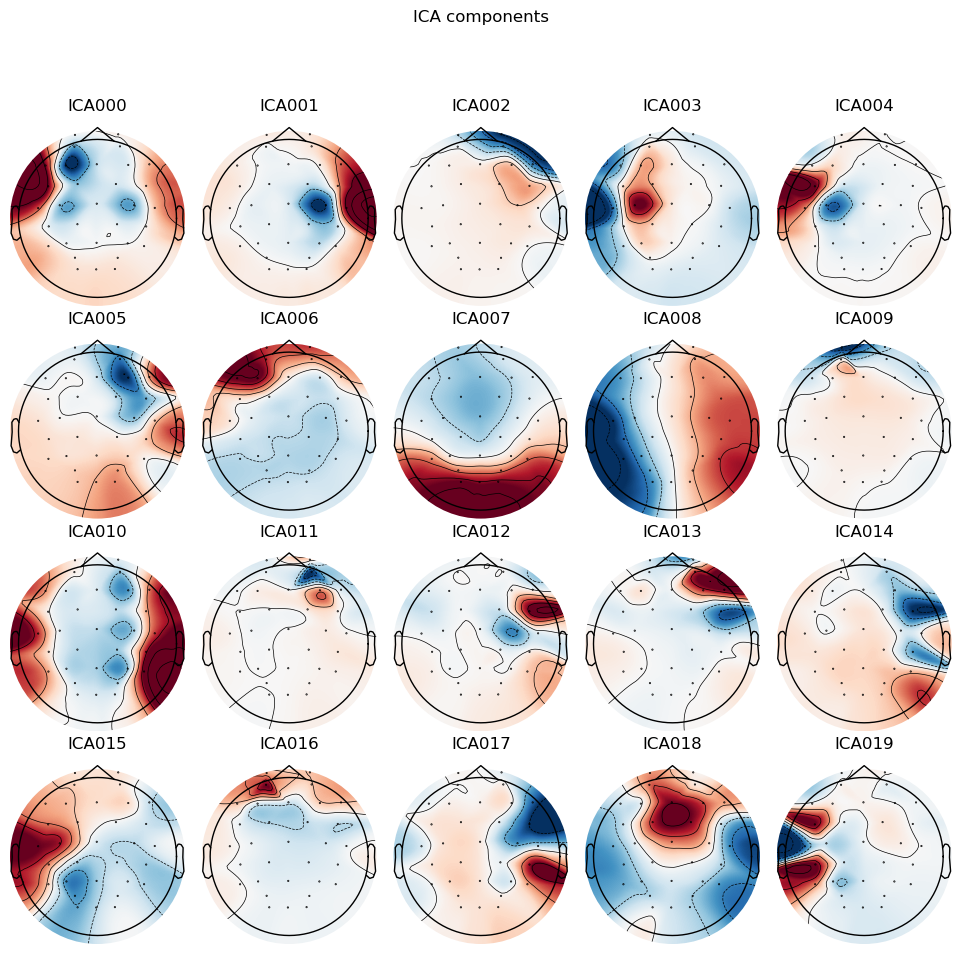

In [35]:
ica.plot_components();

In [36]:
# use automatic detection
bad_indx,scores = ica.find_bads_eog(raw,ch_name=["hEOG_L","hEOG_R","vEOG_U","vEOG_D"],threshold=2)
print(bad_indx)

Using EOG channels: hEOG_L, hEOG_R, vEOG_U, vEOG_D
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 25000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   11.7s finished


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 25000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 25000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   11.1s finished


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 25000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 25000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   12.5s finished


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 25000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 25000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   10.4s finished


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 25000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


[17, 9, 14, 2, 18]


In [35]:
# epochs.plot(n_epochs=5);

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 32 PCA components


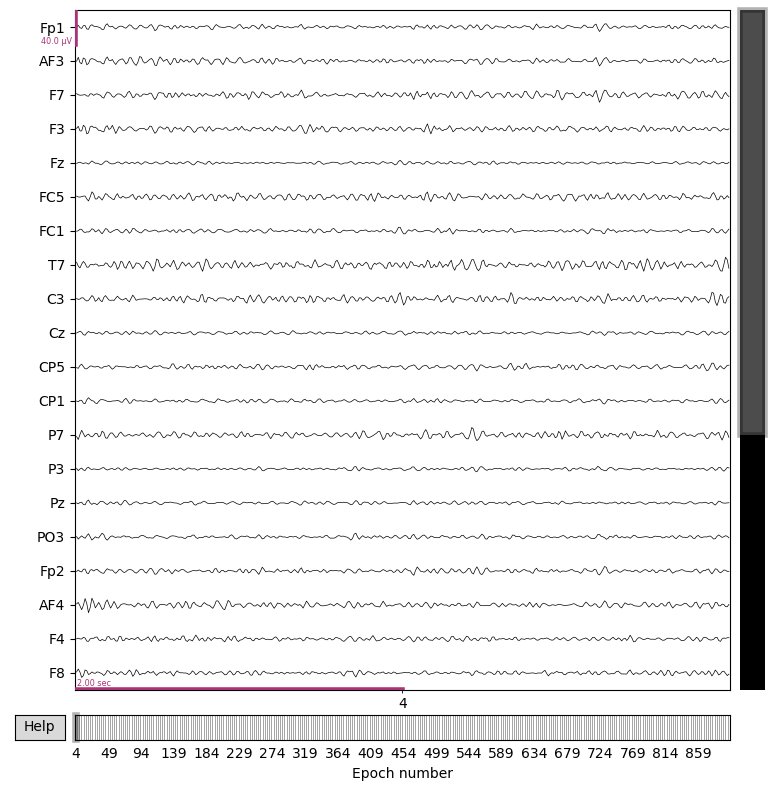

In [38]:
ica.exclude = bad_indx
ica.apply(epochs.copy(),exclude=ica.exclude).plot(n_epochs=1);

In [39]:
ica.apply(epochs,exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 32 PCA components


<Epochs |  300 events (all good), 0 - 3.9992 sec, baseline 0 – 0 sec, ~412.0 MB, data loaded,
 'Stimulus/S 11': 50
 'Stimulus/S 21': 50
 'Stimulus/S 31': 50
 'Stimulus/S 41': 50
 'Stimulus/S 51': 50
 'Stimulus/S 61': 50>

### Repairing artifacts with regression 
Remove EOG artifact signals from other channels by regression.

In [66]:
# # plotting before
# # plot the evoked for the EEG and the EOG sensors
# fig = epochs.average('all').plot()
# fig.set_size_inches(6, 6)

In [67]:
# # Perform regression using the EOG sensor as independent variable and the EEG
# # sensors as dependent variables.
# model_plain = mne.preprocessing.EOGRegression(picks='eeg', picks_artifact='eog').fit(epochs)
# fig = model_plain.plot(vlim=(None, 0.4))  # regression coefficients as topomap
# fig.set_size_inches(3, 2);

In [68]:
# epochs_clean_plain = model_plain.apply(epochs)
# # After regression, we should redo the baseline correction
# epochs_clean_plain.apply_baseline(baseline=(3, 7))
# # Show the evoked potential computed on the corrected data
# fig = epochs_clean_plain.average('all').plot()
# fig.set_size_inches(6, 6)

In [69]:
# # create epochs with the evoked subtracted out
# epochs_sub = epochs.copy().subtract_evoked()

# # perform regression
# model_sub = mne.preprocessing.EOGRegression(picks='eeg', picks_artifact='eog').fit(epochs_sub)
# fig = model_sub.plot(vlim=(None, 0.4))
# fig.set_size_inches(3, 2)

# # apply the regression coefficients to the original epochs
# epochs_clean_sub = model_plain.apply(epochs).apply_baseline(baseline=(3, 7))
# fig = epochs_clean_sub.average('all').plot()
# fig.set_size_inches(6, 6)

In [70]:
# eog_epochs = mne.preprocessing.create_eog_epochs(raw)
# # We need to explicitly specify that we want to average the EOG channel too.
# eog_evoked = eog_epochs.average('all')
# eog_evoked.plot('all')
# fig.set_size_inches(6, 6)

# # perform regression on the evoked blink response
# model_evoked = mne.preprocessing.EOGRegression(picks='eeg', picks_artifact='eog').fit(eog_evoked)
# fig = model_evoked.plot(vlim=(None, 0.4))
# fig.set_size_inches(3, 2)

# # apply the regression coefficients to the original epochs
# epochs_clean_evoked = model_evoked.apply(epochs).apply_baseline(baseline=(3, 7))
# fig = epochs_clean_evoked.average('all').plot()
# fig.set_size_inches(6, 6)

# # for good measure, also show the effect on the blink evoked
# eog_evoked_clean = model_evoked.apply(eog_evoked)
# eog_evoked_clean.apply_baseline(baseline=(0, 0))
# eog_evoked_clean.plot('all')
# fig.set_size_inches(6, 6)

In [71]:
# order = np.concatenate([  # plotting order: EOG first, then EEG
#     mne.pick_types(raw.info, meg=False, eog=True),
#     mne.pick_types(raw.info, meg=False, eeg=True),
# ])
# raw_kwargs = dict(events=eog_epochs.events, order=order, start=13, duration=3,
#                   n_channels=10, scalings=dict(eeg=50e-6, eog=250e-6))

# # plot original data
# raw.plot(**raw_kwargs);

# # regress (using coefficients computed previously) and plot
# raw_clean = model_evoked.apply(raw)
# raw_clean.plot(**raw_kwargs);

In [40]:
# epochs.apply_baseline((None,0))

In [41]:
# epochs["Stimulus/S 41"].plot_image(picks=[5]); # picks=[channel index]

In [ ]:
# epochs.equalize_event_counts(event_ids)
# epochs

### Prepare & Split data

In [21]:
epochs.pick_types(eeg=True)
data = epochs.get_data()

In [29]:
labels = np.empty(shape=(data.shape[0]))
decode = {11: 0, 21: 1, 31: 2, 41:3, 51: 4, 61: 5, 8 :6}
k=0
for i in epochs.events:
    labels[k]=decode[i[2]]
    k+=1

In [23]:
data.shape

(300, 32, 5000)

In [24]:
labels.shape

(300,)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size = 0.2,stratify=labels,shuffle=True)

In [31]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=6) 
y_val=tf.keras.utils.to_categorical(y_val,num_classes=6) 

In [32]:
# Normaliation
# X_train = MinMaxScaler().fit_transform(X_train)
# X_val = MinMaxScaler().fit_transform(X_val)
# X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
# X_val = (X_val-np.min(X_val))/(np.max(X_val)-np.min(X_val))
def Normalize(data):
    for i in range(0,data.shape[0]):
        for j in range(0,data.shape[1]):
            min_ , max_ = min(data[i][j]) , max(data[i][j]) 
            data[i][j] = (data[i][j] - min_)/(max_ - min_)

Normalize(X_train)
Normalize(X_val)

In [64]:
# def preprocess_input(eeg_signals):
#     eeg_signals_3d = np.zeros((eeg_signals.shape[0], 32, 5000, 3))
#     for i in range(eeg_signals.shape[0]):
#         trial_3d = np.dstack([eeg_signals[0],eeg_signals[0],eeg_signals[0]])
#         eeg_signals_3d[i] = trial_3d
#     return eeg_signals_3d
# X_train = preprocess_input(X_train)
# X_val = preprocess_input(X_val)

In [34]:
print('X_train: ',X_train.shape)
print('X_val:   ',X_val.shape)
print('y_train: ',y_train.shape)
print('y_val:   ',y_val.shape)

X_train:  (240, 32, 5000)
X_val:    (60, 32, 5000)
y_train:  (240, 6)
y_val:    (60, 6)


## Model EEGNet

In [35]:
from EEGModels import EEGNet 
model = EEGNet(nb_classes=6, Chans = 32, Samples = 5000, dropoutRate = 0.2, kernLength = 64, F1 = 8, D = 2, F2 = 16, dropoutType = 'Dropout')

In [36]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.BinaryFocalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [147]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 5000, 1)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 5000, 8)       512       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 5000, 8)      32        
 hNormalization)                                                 
                                                                 
 depthwise_conv2d_2 (Depthwi  (None, 1, 5000, 16)      512       
 seConv2D)                                                       
                                                                 
 batch_normalization_7 (Batc  (None, 1, 5000, 16)      64        
 hNormalization)                                                 
                                                           

In [37]:
Epochs=40
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
history = model.fit(X_train,y_train,
                    epochs=Epochs,
                    validation_data=(X_val,y_val),
                     batch_size=32,
                     verbose=1)         #,callbacks=[early_stopping]

Epoch 1/40
8/8 [==============================] - 52s 7s/step - loss: 0.1885 - accuracy: 0.1500 - val_loss: 0.1907 - val_accuracy: 0.1667
Epoch 2/40
8/8 [==============================] - 46s 6s/step - loss: 0.1533 - accuracy: 0.2750 - val_loss: 0.1884 - val_accuracy: 0.1000
Epoch 3/40
8/8 [==============================] - 47s 6s/step - loss: 0.1311 - accuracy: 0.3708 - val_loss: 0.1848 - val_accuracy: 0.1333
Epoch 4/40
8/8 [==============================] - 49s 6s/step - loss: 0.1211 - accuracy: 0.5958 - val_loss: 0.1812 - val_accuracy: 0.1500
Epoch 5/40
8/8 [==============================] - 45s 6s/step - loss: 0.1167 - accuracy: 0.7417 - val_loss: 0.1784 - val_accuracy: 0.1667
Epoch 6/40
8/8 [==============================] - 65s 8s/step - loss: 0.1141 - accuracy: 0.7792 - val_loss: 0.1762 - val_accuracy: 0.1667
Epoch 7/40
8/8 [==============================] - 67s 8s/step - loss: 0.1116 - accuracy: 0.8458 - val_loss: 0.1745 - val_accuracy: 0.1667
Epoch 8/40
8/8 [==================

In [123]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

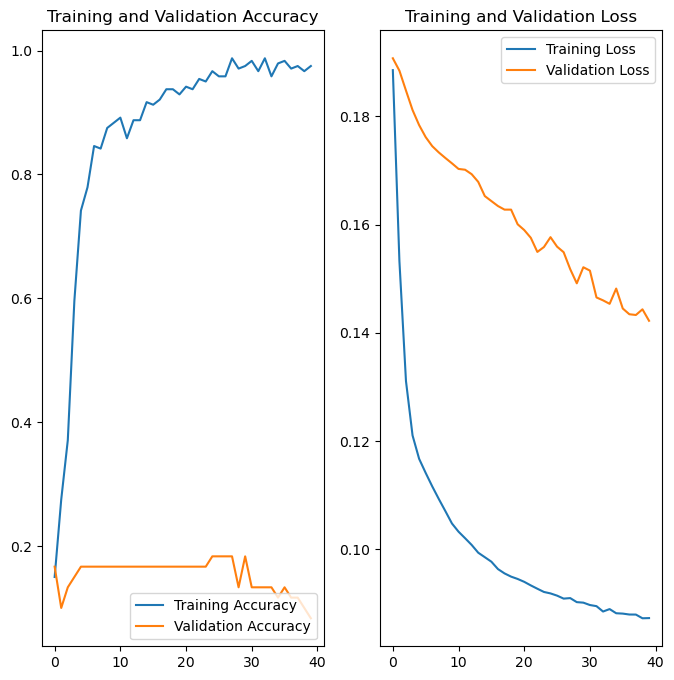

In [38]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
model.evaluate(X_train,y_train)

8/8 [==============================] - 1s 180ms/step - loss: 0.1234 - accuracy: 0.9042


[0.12342943996191025, 0.9041666388511658]

In [40]:
model.evaluate(X_val,y_val)

2/2 [==============================] - 0s 170ms/step - loss: 0.1422 - accuracy: 0.0833


[0.14223922789096832, 0.0833333358168602]

## Model CSP + MLP

In [155]:
from mne.decoding import CSP

csp = CSP(n_components=32, reg=None, norm_trace=True)

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(X_train, y_train)

# Apply CSP transform to training data
X_train_csp = csp.transform(X_train)
X_val_csp = csp.transform(X_val)

Computing rank from data with rank=None
    Using tolerance 9.1 (2.2e-16 eps * 32 dim * 1.3e+15  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.1 (2.2e-16 eps * 32 dim * 1.3e+15  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.1 (2.2e-16 eps * 32 dim * 1.3e+15  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9 (2.2e-16 eps * 32 dim * 1.3e+15  max singular value)
    Estimated rank

In [156]:
print(X_train_csp.shape)
print(X_val_csp.shape)

(480, 32)
(120, 32)


In [157]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(10, 5),
                    random_state=10,
                    verbose=True,
                    max_iter=50,
                    learning_rate_init=0.1)

# Fit data onto the model
clf.fit(X_train_csp,y_train)

Iteration 1, loss = 2.41602073
Iteration 2, loss = 1.76602811
Iteration 3, loss = 1.63246023
Iteration 4, loss = 1.60961703
Iteration 5, loss = 1.60105720
Iteration 6, loss = 1.59812893
Iteration 7, loss = 1.59793256
Iteration 8, loss = 1.59854034
Iteration 9, loss = 1.59628903
Iteration 10, loss = 1.59614541
Iteration 11, loss = 1.59442835
Iteration 12, loss = 1.59413008
Iteration 13, loss = 1.59244673
Iteration 14, loss = 1.59074297
Iteration 15, loss = 1.58958284
Iteration 16, loss = 1.58990084
Iteration 17, loss = 1.58970232
Iteration 18, loss = 1.58994814
Iteration 19, loss = 1.58999247
Iteration 20, loss = 1.59008685
Iteration 21, loss = 1.59020817
Iteration 22, loss = 1.58978580
Iteration 23, loss = 1.58966473
Iteration 24, loss = 1.58993635
Iteration 25, loss = 1.58994219
Iteration 26, loss = 1.58995435
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(10, 5), learning_rate_init=0.1, max_iter=50,
              random_state=10, verbose=True)

In [158]:
# Make prediction on test dataset
ypred=clf.predict(X_val_csp)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_val,ypred)

0.5

## Model CNN

In [168]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(32,5000)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [169]:
model2.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.BinaryFocalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [170]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 30, 64)            960064    
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 15, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 13, 128)           24704     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 6, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 4, 256)            98560     
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 2, 256)          

In [171]:
Epochs=100
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
history = model2.fit(X_train,y_train,
                    epochs=Epochs,
                    validation_data=(X_val,y_val),
                     batch_size=32,
                     verbose=1)         #,callbacks=[early_stopping]

Epoch 1/100
15/15 [==============================] - 1s 58ms/step - loss: 0.1418 - accuracy: 0.2396 - val_loss: 0.1115 - val_accuracy: 0.5000
Epoch 2/100
15/15 [==============================] - 1s 45ms/step - loss: 0.1106 - accuracy: 0.5000 - val_loss: 0.1071 - val_accuracy: 0.5000
Epoch 3/100
15/15 [==============================] - 1s 45ms/step - loss: 0.1066 - accuracy: 0.5000 - val_loss: 0.1061 - val_accuracy: 0.5000
Epoch 4/100
15/15 [==============================] - 1s 45ms/step - loss: 0.1060 - accuracy: 0.5000 - val_loss: 0.1060 - val_accuracy: 0.5000
Epoch 5/100
15/15 [==============================] - 1s 49ms/step - loss: 0.1060 - accuracy: 0.5000 - val_loss: 0.1060 - val_accuracy: 0.5000
Epoch 6/100
15/15 [==============================] - 1s 46ms/step - loss: 0.1058 - accuracy: 0.5000 - val_loss: 0.1056 - val_accuracy: 0.5000
Epoch 7/100
15/15 [==============================] - 1s 44ms/step - loss: 0.1053 - accuracy: 0.5000 - val_loss: 0.1055 - val_accuracy: 0.5000
Epoch 

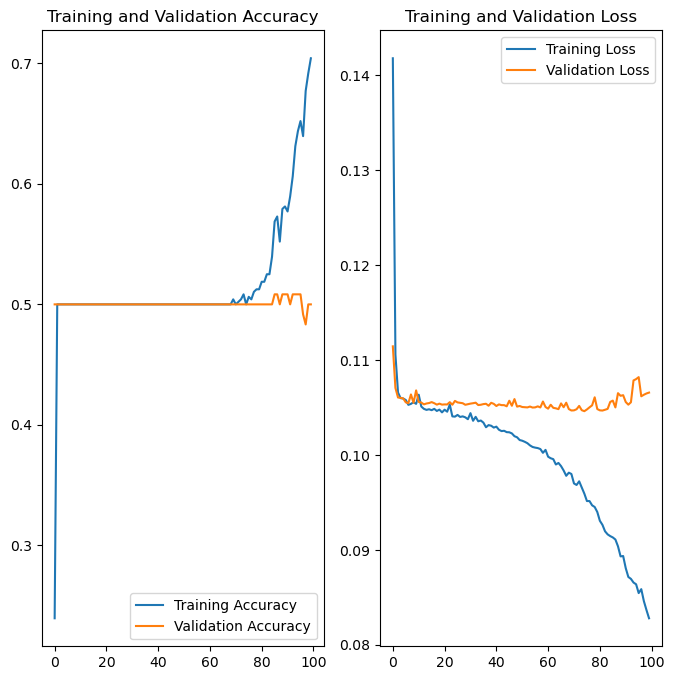

In [172]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [173]:
model2.evaluate(X_train,y_train)

15/15 [==============================] - 0s 14ms/step - loss: 0.0820 - accuracy: 0.7542


[0.08196569234132767, 0.7541666626930237]

In [174]:
model2.evaluate(X_val,y_val)

4/4 [==============================] - 0s 12ms/step - loss: 0.1066 - accuracy: 0.5000


[0.10657885670661926, 0.5]

## Model ResNet

In [100]:
ResNet50 = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(32, 5000, 3),
)

In [101]:
model = tf.keras.models.Sequential([
    ResNet50,
    # tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7,activation='softmax')
])

In [102]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.BinaryFocalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 157, 2048)      23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 7)                 7175      
                                                                 
Total params: 25,693,063
Trainable params: 25,639,943
Non-trainable params: 53,120
_________________________________________________________________


In [104]:
Epochs=10
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
history = model.fit(X_train,y_train,
                    epochs=Epochs,
                    validation_data=(X_val,y_val),
                    batch_size=32,
                    verbose=1)#,callbacks=[early_stopping]

Epoch 1/10
